In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.metrics import roc_curve, plot_roc_curve, mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, LinearRegression
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [65]:
df = pd.read_csv('Air_Canada.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-03-31,2.25,2.250000,2.100000,2.220000,2.220000,967000.0
1,2010-04-01,2.25,2.500000,2.250000,2.450000,2.450000,3302800.0
2,2010-04-05,2.51,2.670000,2.500000,2.520000,2.520000,2309000.0
3,2010-04-06,2.58,2.600000,2.540000,2.550000,2.550000,661000.0
4,2010-04-07,2.60,2.600000,2.520000,2.530000,2.530000,1639300.0
...,...,...,...,...,...,...,...
3025,2022-04-21,24.65,25.000000,24.430000,24.660000,24.660000,5094000.0
3026,2022-04-22,24.67,24.850000,24.110001,24.150000,24.150000,3691400.0
3027,2022-04-25,24.00,24.440001,23.680000,24.219999,24.219999,4138600.0
3028,2022-04-26,24.25,24.260000,22.360001,22.459999,22.459999,7166700.0


In [66]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3.028000e+03
mean,14.761238,15.001770,14.510647,14.753729,14.753729,2.123363e+06
std,12.188114,12.368373,12.024993,12.197018,12.197018,2.143008e+06
min,0.800000,0.830000,0.780000,0.820000,0.820000,0.000000e+00
25%,3.080000,3.120000,3.017500,3.080000,3.080000,8.713500e+05
50%,12.050000,12.215000,11.855000,12.030000,12.030000,1.436150e+06
75%,23.642499,23.990000,23.242500,23.602500,23.602500,2.657625e+06
max,52.029999,52.709999,51.560001,52.090000,52.090000,2.715840e+07


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3030 non-null   object 
 1   Open       3028 non-null   float64
 2   High       3028 non-null   float64
 3   Low        3028 non-null   float64
 4   Close      3028 non-null   float64
 5   Adj Close  3028 non-null   float64
 6   Volume     3028 non-null   float64
dtypes: float64(6), object(1)
memory usage: 165.8+ KB


In [68]:
df.dropna(inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3028 entries, 0 to 3029
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3028 non-null   object 
 1   Open       3028 non-null   float64
 2   High       3028 non-null   float64
 3   Low        3028 non-null   float64
 4   Close      3028 non-null   float64
 5   Adj Close  3028 non-null   float64
 6   Volume     3028 non-null   float64
dtypes: float64(6), object(1)
memory usage: 189.2+ KB


In [9]:
#Remove the unused columns
#del df['Symbol']
#del df ['LastShares']
#del df ['LastPx']
#del df ['lastMkt']
#del df ['timeStamp']
#del df ['MsgSeqNum']

In [70]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-03-31,2.25,2.250000,2.100000,2.220000,2.220000,967000.0
1,2010-04-01,2.25,2.500000,2.250000,2.450000,2.450000,3302800.0
2,2010-04-05,2.51,2.670000,2.500000,2.520000,2.520000,2309000.0
3,2010-04-06,2.58,2.600000,2.540000,2.550000,2.550000,661000.0
4,2010-04-07,2.60,2.600000,2.520000,2.530000,2.530000,1639300.0
...,...,...,...,...,...,...,...
3025,2022-04-21,24.65,25.000000,24.430000,24.660000,24.660000,5094000.0
3026,2022-04-22,24.67,24.850000,24.110001,24.150000,24.150000,3691400.0
3027,2022-04-25,24.00,24.440001,23.680000,24.219999,24.219999,4138600.0
3028,2022-04-26,24.25,24.260000,22.360001,22.459999,22.459999,7166700.0


In [71]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999705,0.999585,0.999407,0.999407,0.078816
High,0.999705,1.000000,0.999474,0.999731,0.999731,0.085336
Low,0.999585,0.999474,1.000000,0.999698,0.999698,0.068376
Close,0.999407,0.999731,0.999698,1.000000,1.000000,0.077260
Adj Close,0.999407,0.999731,0.999698,1.000000,1.000000,0.077260
Volume,0.078816,0.085336,0.068376,0.077260,0.077260,1.000000


In [72]:
df.rename(columns = {'Adj Close':'Adj_Close'}, inplace = True)

In [73]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2010-03-31,2.25,2.250000,2.100000,2.220000,2.220000,967000.0
1,2010-04-01,2.25,2.500000,2.250000,2.450000,2.450000,3302800.0
2,2010-04-05,2.51,2.670000,2.500000,2.520000,2.520000,2309000.0
3,2010-04-06,2.58,2.600000,2.540000,2.550000,2.550000,661000.0
4,2010-04-07,2.60,2.600000,2.520000,2.530000,2.530000,1639300.0
...,...,...,...,...,...,...,...
3025,2022-04-21,24.65,25.000000,24.430000,24.660000,24.660000,5094000.0
3026,2022-04-22,24.67,24.850000,24.110001,24.150000,24.150000,3691400.0
3027,2022-04-25,24.00,24.440001,23.680000,24.219999,24.219999,4138600.0
3028,2022-04-26,24.25,24.260000,22.360001,22.459999,22.459999,7166700.0


In [74]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=df.Date,y=df['Adj_Close'], mode='lines'))
fig.show()

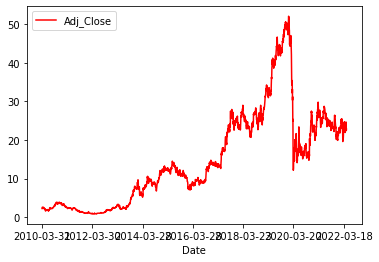

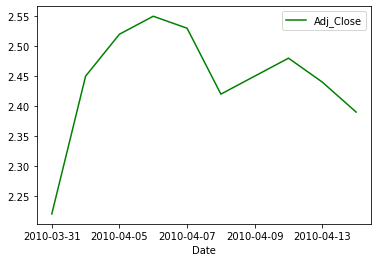

In [75]:
#  Plotting date vs the close market stock price
df.plot('Date','Adj_Close',color="red")
 
# Extract only top 600 rows to make the plot a little clearer
new_data = df.head(10)
 
#  Plotting date vs the close  market stock price
new_data.plot('Date','Adj_Close',color="green")
 
plt.show()

In [16]:
import datetime as dt
import pandas as pd



#first: define the format of date column in the dataframe
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
#second: convert to the desired date format
df['Date']=df['Date'].dt.strftime('%Y')
#print first five rows
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2010,2.25,2.250000,2.100000,2.220000,2.220000,967000.0
1,2010,2.25,2.500000,2.250000,2.450000,2.450000,3302800.0
2,2010,2.51,2.670000,2.500000,2.520000,2.520000,2309000.0
3,2010,2.58,2.600000,2.540000,2.550000,2.550000,661000.0
4,2010,2.60,2.600000,2.520000,2.530000,2.530000,1639300.0
...,...,...,...,...,...,...,...
3025,2022,24.65,25.000000,24.430000,24.660000,24.660000,5094000.0
3026,2022,24.67,24.850000,24.110001,24.150000,24.150000,3691400.0
3027,2022,24.00,24.440001,23.680000,24.219999,24.219999,4138600.0
3028,2022,24.25,24.260000,22.360001,22.459999,22.459999,7166700.0


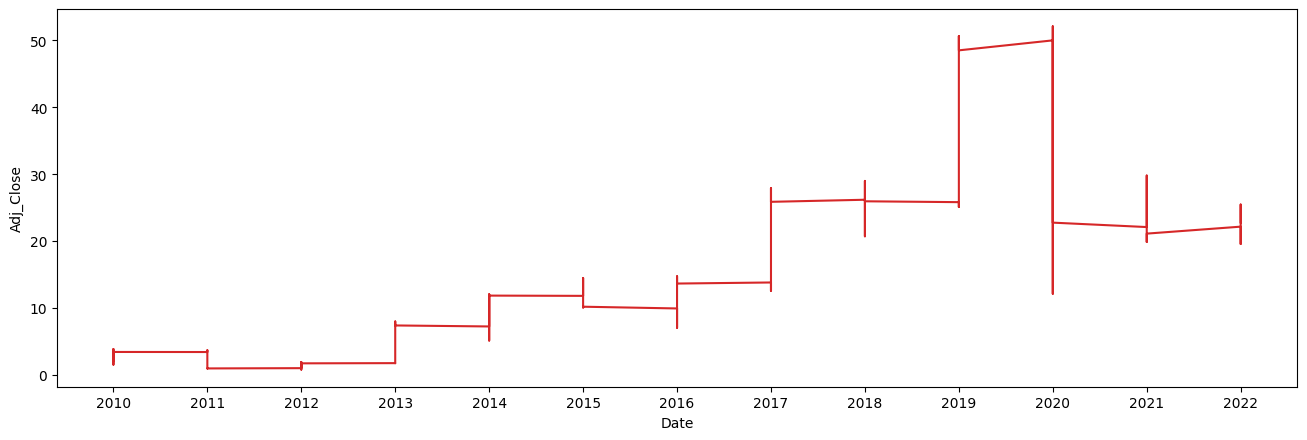

In [17]:
# Draw Plot
def plot_df(data, x, y, title="Time by Price", xlabel='Date', ylabel='Adj_Close', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.Date, y=df.Adj_Close, title='')

Text(0.5, 1.0, 'Price distributions')

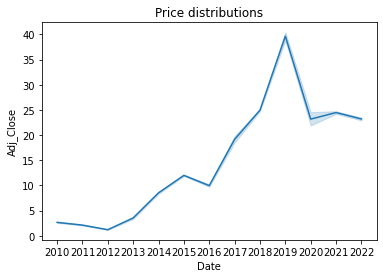

In [18]:
sns.lineplot(x="Date",  y = "Adj_Close",data=df).set_title("Price distributions")

In [19]:
df = df.dropna(subset = ['Adj_Close'])
test_list = df['Adj_Close']
inc, dec = [], []
l = []
res = []
temp = []
is_up = True 
if test_list[0] > test_list[1]:
    is_up = False
for idx, (curr, nex) in enumerate(zip(test_list, test_list[1:])):
    temp.append(curr)
    if (nex > curr and not is_up) or (nex < curr and is_up):
        res.append(temp)
        temp = []
        is_up = not is_up
        b = 'dump' if is_up else 'pump'
        l.append(b)
    else:
        b = 'pump' if is_up else 'dump'
        l.append(b)
temp.append(nex)
res.append(temp)
if df.Adj_Close.iloc[-2] > nex:
    l.append('dump')
else:
    l.append('pump')
for i in res:
    if len(i)>1:
        if i[1]>i[0]:
            inc.append(i)
        if i[0]>i[1]:
            dec.append(i)
df['label'] = l

In [20]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume,label
0,2010,2.25,2.250000,2.100000,2.220000,2.220000,967000.0,pump
1,2010,2.25,2.500000,2.250000,2.450000,2.450000,3302800.0,pump
2,2010,2.51,2.670000,2.500000,2.520000,2.520000,2309000.0,pump
3,2010,2.58,2.600000,2.540000,2.550000,2.550000,661000.0,pump
4,2010,2.60,2.600000,2.520000,2.530000,2.530000,1639300.0,dump
...,...,...,...,...,...,...,...,...
3025,2022,24.65,25.000000,24.430000,24.660000,24.660000,5094000.0,pump
3026,2022,24.67,24.850000,24.110001,24.150000,24.150000,3691400.0,dump
3027,2022,24.00,24.440001,23.680000,24.219999,24.219999,4138600.0,pump
3028,2022,24.25,24.260000,22.360001,22.459999,22.459999,7166700.0,dump


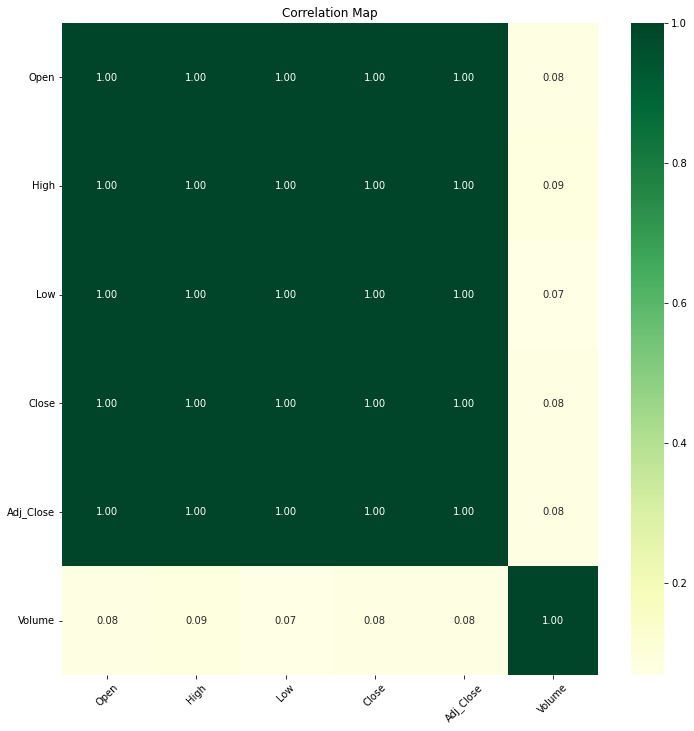

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='YlGn', annot=True, fmt = ".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

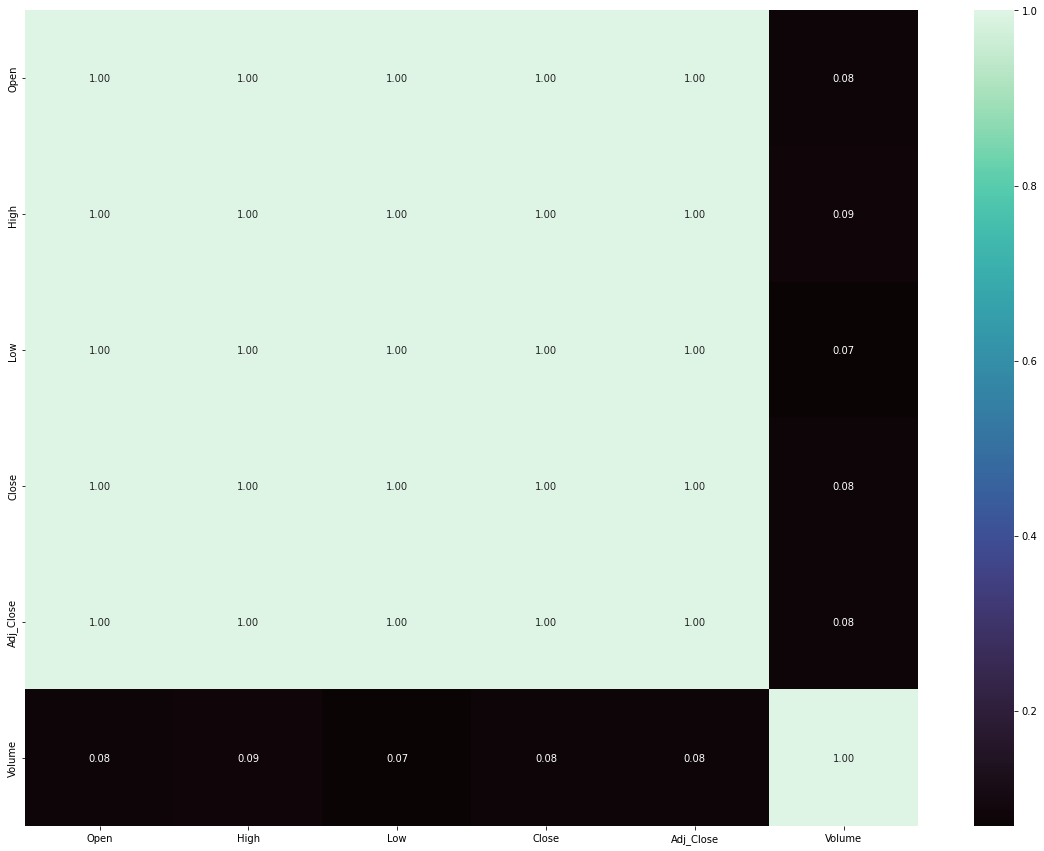

In [22]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), cmap='mako', annot=True, fmt="0.2f")

In [23]:
df = df['Adj_Close'].values
df = df.reshape(-1, 1)

In [24]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [26]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [27]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [28]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
model1 = Sequential()
model1.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(units=96,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=96,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=96))
model1.add(Dropout(0.2))
model1.add(Dense(units=1))

In [30]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from keras.models import Model
import tensorflow

In [32]:
model1.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
history=model1.fit(x_train, y_train, epochs=10, batch_size=32,validation_data=(x_test, y_test),verbose=1,shuffle=False)

Epoch 1/10
75/75 [==============================] - 38s 395ms/step - loss: 0.0033 - val_loss: 0.1464
Epoch 2/10
75/75 [==============================] - 15s 193ms/step - loss: 0.0282 - val_loss: 0.1626
Epoch 3/10
75/75 [==============================] - 14s 181ms/step - loss: 0.0338 - val_loss: 0.4250
Epoch 4/10
75/75 [==============================] - 14s 181ms/step - loss: 0.0411 - val_loss: 0.2022
Epoch 5/10
75/75 [==============================] - 14s 181ms/step - loss: 0.0302 - val_loss: 0.0159
Epoch 6/10
75/75 [==============================] - 14s 180ms/step - loss: 0.0191 - val_loss: 0.1047
Epoch 7/10
75/75 [==============================] - 14s 181ms/step - loss: 0.0055 - val_loss: 0.3138
Epoch 8/10
75/75 [==============================] - 15s 199ms/step - loss: 0.0418 - val_loss: 0.3043
Epoch 9/10
75/75 [==============================] - 13s 180ms/step - loss: 0.0576 - val_loss: 0.0191
Epoch 10/10
75/75 [==============================] - 14s 183ms/step - loss: 0.0284 - val_lo

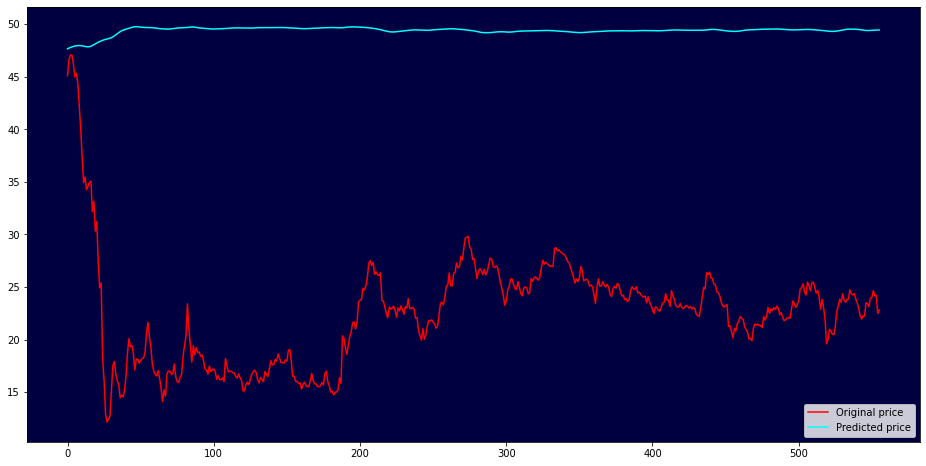

In [34]:
predictions = model1.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [35]:
### Lets Do the prediction and check performance metrics
train_predict=model1.predict(x_train)
test_predict=model1.predict(x_test)

In [36]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
#score= model1.evaluate(x_test, y_test)
#print('loss = ', score[0])

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

49.41451508596601

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

48.9554555216926

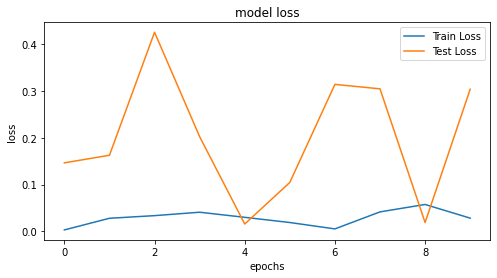

In [40]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

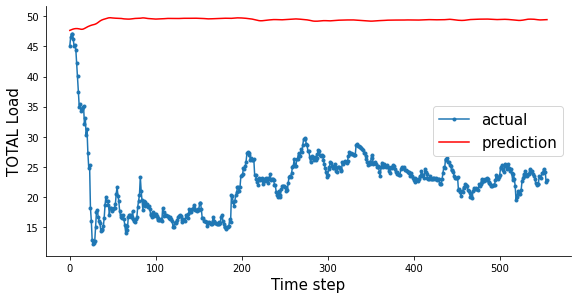

In [41]:
predictions = model1.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(8,4))
plt.plot(y_test_scaled, marker='.', label="actual")
plt.plot(predictions, 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('TOTAL Load', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [42]:
from keras.utils.vis_utils import plot_model

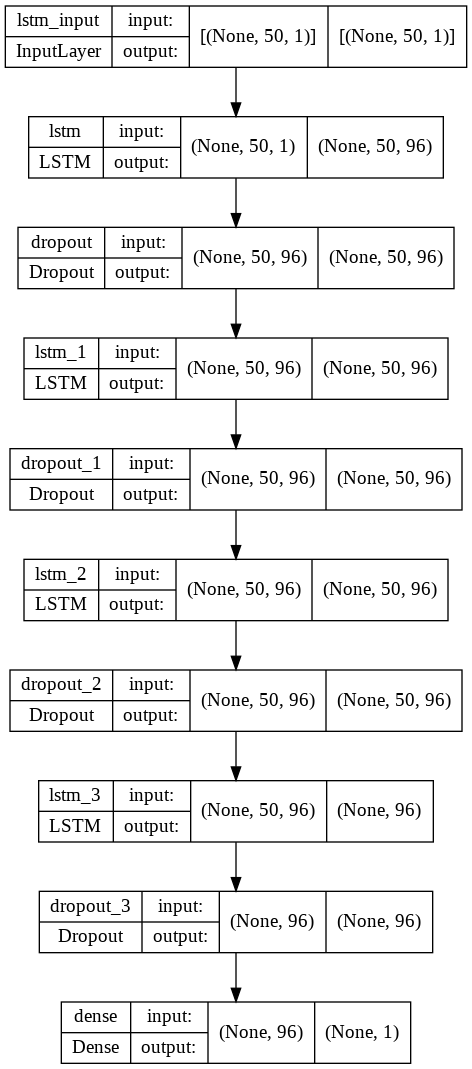

In [43]:
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# **CNN**

In [44]:
from keras.layers.convolutional import Conv1D
from keras.layers import Flatten

In [45]:
model2 = Sequential()
model2.add(Conv1D(filters=48, kernel_size=2, strides=1, padding='causal', activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model2.add(Flatten())
model2.add(Dense(48, activation='relu'))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')

history = model2.fit(x_train, y_train, epochs=200, batch_size=70, validation_data=(x_test, y_test),verbose=1, shuffle=False)

model2.summary()

Epoch 1/200
34/34 [==============================] - 1s 12ms/step - loss: 0.0044 - val_loss: 0.0131
Epoch 2/200
34/34 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0182
Epoch 3/200
34/34 [==============================] - 0s 8ms/step - loss: 0.0035 - val_loss: 0.0099
Epoch 4/200
34/34 [==============================] - 0s 8ms/step - loss: 0.0052 - val_loss: 0.0163
Epoch 5/200
34/34 [==============================] - 0s 8ms/step - loss: 0.0044 - val_loss: 0.0199
Epoch 6/200
34/34 [==============================] - 0s 8ms/step - loss: 0.0063 - val_loss: 0.0142
Epoch 7/200
34/34 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 0.0088
Epoch 8/200
34/34 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.0154
Epoch 9/200
34/34 [==============================] - 0s 9ms/step - loss: 0.0051 - val_loss: 0.0118
Epoch 10/200
34/34 [==============================] - 0s 8ms/step - loss: 0.0040 - val_loss: 0.0325
Epoch 11

In [46]:
train_predict = model2.predict(x_train)
test_predict = model2.predict(x_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])
print('Train Mean Absolute Error:', mean_absolute_error(y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 2.2417695416924026
Train Root Mean Squared Error: 2.3518426792679494
Test Mean Absolute Error: 2.772894704050188
Test Root Mean Squared Error: 3.38145897691641


In [47]:
mape_train = np.mean(np.abs((y_train[0] - train_predict[:,0]) / y_train[0])) * 100
mape_test = np.mean(np.abs((y_test[0] - test_predict[:,0]) / y_test[0])) * 100

print("Train MAPE: {}, Test MAPE: {}".format(mape_train, mape_test))

Train MAPE: 63.67503028306086, Test MAPE: 13.128039790567591


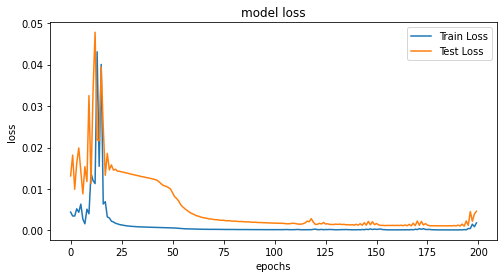

In [48]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

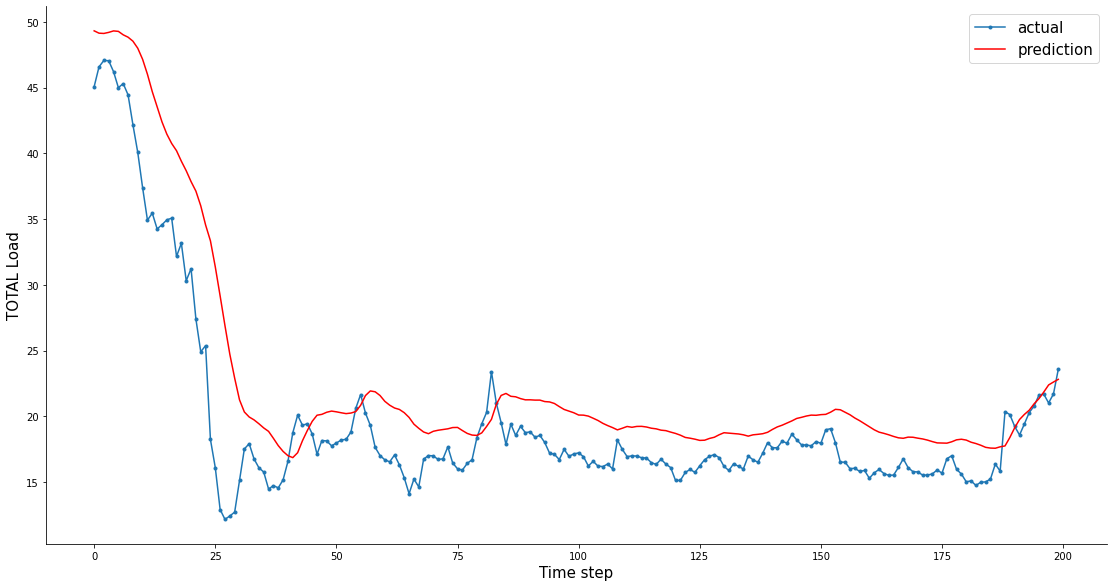

In [49]:
idx = 200
aa=[x for x in range(idx)]
plt.figure(figsize=(16,8))
ax.set_facecolor('#000041')
plt.plot(aa, y_test[0][:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('TOTAL Load', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

# **ARMA**

In [50]:
scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
df = scaler.fit_transform(df) # fit and transform the dataset

# Train and Test splits
train_size = int(len(df) * 0.80) 
test_size = len(df) - train_size   
train, test = df[0:train_size,:], df[train_size:len(df),:]

In [51]:
def test_metrics():
    print('Test Mean Absolute Error:', mean_absolute_error(y_test, test_predict))
    print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, test_predict)))
    print("Testing MAPE: {}".format(mape))
    

In [52]:
def pred_plot():
  idx = 200
  aa=[x for x in range(idx)]
  plt.figure(figsize=(8,4))
  plt.plot(aa, y_test[:idx], marker='.', label="actual")
  plt.plot(aa, test_predict[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  plt.tight_layout()
  sns.despine(top=True)
  plt.subplots_adjust(left=0.07)
  plt.ylabel('TOTAL Load', size=15)
  plt.xlabel('Time step', size=15)
  plt.legend(fontsize=15)
  plt.show();

# **ARMA building**

In [53]:
from statsmodels.tsa.arima_model import ARMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [54]:
model = ARMA(train, order=(2,0,1))
model_fit = model.fit(disp=False)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [55]:
test_predict = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# invert predictions
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_test = scaler.inverse_transform(test)
mape_ARMA = np.mean(np.abs((y_test - test_predict) / y_test)) * 100

In [56]:
print(mape_ARMA)

124.32826975118093


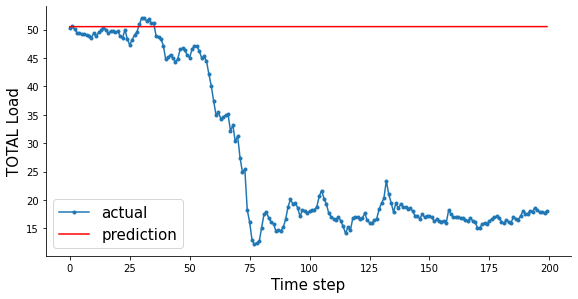

In [57]:
pred_plot()

# **ARIMA**

In [58]:
from statsmodels.tsa.arima_model import ARIMA

In [59]:
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit(disp=False)

In [60]:
test_predict = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# invert predictions
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
Y_test = scaler.inverse_transform(test)
mape_ARIMA = np.mean(np.abs((Y_test - test_predict) / Y_test)) * 100

In [61]:
print(mape_ARIMA)

96.2718728258453


In [62]:
#test_metrics()

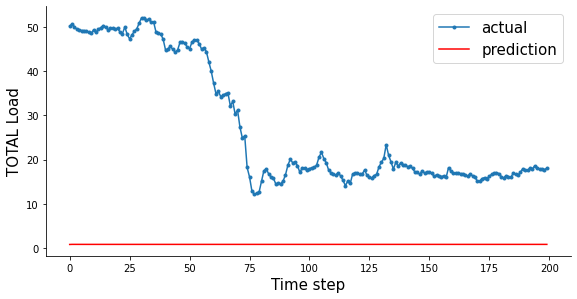

In [63]:
pred_plot()